In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #type:ignore
from tensorflow.keras.datasets import mnist #type:ignore
from tensorflow.keras.utils import to_categorical #type:ignore
import matplotlib.pyplot as plt

In [41]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [47]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])


In [49]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [51]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=3, 
                    batch_size=64, 
                    validation_split=0.2, 
                    verbose=1)


Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6698 - loss: 2.4347 - val_accuracy: 0.9703 - val_loss: 0.0973
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9380 - loss: 0.2097 - val_accuracy: 0.9786 - val_loss: 0.0734
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9587 - loss: 0.1441 - val_accuracy: 0.9820 - val_loss: 0.0623


In [53]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save("digit_recognition_cnn.h5")

Test Accuracy: 98.22%


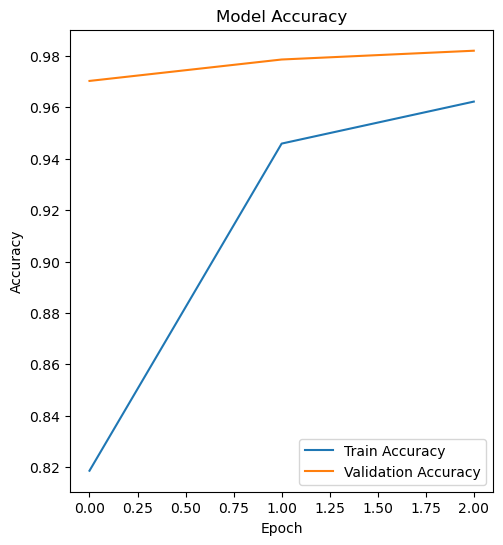

In [57]:
# Visualize training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
